130321
130321
[1.       1.166459 1.167172 ... 1.265948 1.264374 1.262806]
[0.16069186 0.16131999 0.16195055 ... 0.17013517 0.16947219 0.16881159]


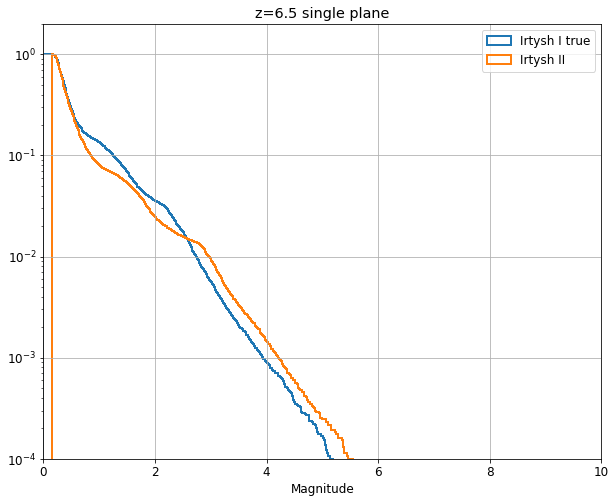

In [4]:
import glob
import sys
import numpy as np
import operator
from scipy import optimize
from scipy import stats
from scipy.ndimage import gaussian_filter
import math
from scipy.interpolate import RegularGridInterpolator

import matplotlib
import matplotlib.pyplot as plt
from matplotlib import rc

run_num=40
n_bins = 500


mag1= np.genfromtxt('../magI.dat', dtype=(
    {'names': ['ix', 'iy','im' ,'xs','ys','mag'], 'formats': ['f8', 'f8', 'f8','f8', 'f8', 'f8']}))
mag2= np.genfromtxt('../magII.dat', dtype=(
    {'names': ['ix', 'iy','im' ,'xs','ys','mag'], 'formats': ['f8', 'f8', 'f8','f8', 'f8', 'f8']}))



N1=len(mag1['mag'])
print(N1)
N2=len(mag2['mag'])
print(N2)


m1=2.5*np.log10(mag1['mag'])
# m1=mag1['mag']
print(mag1['mag'])

m2=2.5*np.log10(mag2['mag'])
# m2=mag2['mag']
print(m2)


counts=np.zeros([40,999])
bins=np.zeros([40,1000])


matplotlib.rcParams.update({'font.size': 12})

n_bins = np.linspace(0, 8.0, num=1000)
fig, ax = plt.subplots(figsize=(10, 8))

# muavg = [0 for n in range(32761)]
# muavgsq= [0 for n in range(32761)]

# for filename in glob.glob('mag*.dat'):
#     mag= np.genfromtxt(filename, dtype=(
#         {'names': ['iz','z','ix', 'iy','im' ,'xs','ys','mag','vol','magpervol'], 
#          'formats': ['f8','f8','f8','f8','f8', 'f8', 'f8','f8', 'f8', 'f8']}))
#     m=2.5*np.log10(mag['mag'])
# #     print(len(m))
#     muavg=muavg+mag['mag']
#     muavgsq=muavgsq+mag['mag']*mag['mag']
    
#     m[0]=0
#     ax.hist(m, n_bins, density=True, histtype='step',cumulative=-1,linewidth=2,alpha=0.1)

    
        
# muavg=muavg/run_num
# muavg[0]=0
# muavgsq=muavgsq/run_num
# print(muavg)
# plot the cumulative histogram
# Will multiplying help?
ax.hist(m1, n_bins, density=True, histtype='step',cumulative=-1, label='Irtysh I true',linewidth=2) # Will multiplying help?
ax.hist(m2, n_bins, density=True, histtype='step',cumulative=-1, label='Irtysh II',linewidth=2)
# ax.hist(2.5*np.log10(muavg), n_bins, density=True, histtype='step',cumulative=-1,linewidth=2,label='Irtysh I reconst')
# ax.errorbar(muerr, n, yerr=0.01, fmt='none')
plt.grid(True)
plt.axis([0, 10, 0.0001, 2])
plt.yscale('log')
ax.set_title('z=6.5 single plane')
ax.set_xlabel('Magnitude')
# plt.xscale('log')
# ax2.set_title('IrtyshII')
# ax2.set_xlabel('Fractional Mass Dispersion')
ax.legend(loc='upper right')
plt.show()
fig.savefig('z6.5_avg_runs_comp.png', dpi=300)

1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
0.0


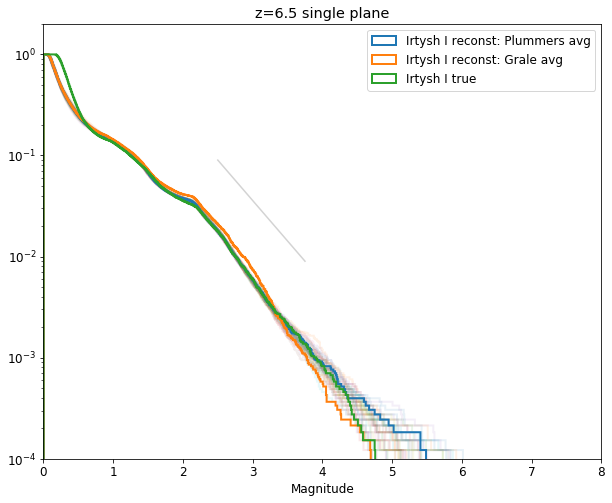

In [3]:
import glob
import sys
import numpy as np
import operator
from scipy import optimize
from scipy import stats
from scipy.ndimage import gaussian_filter
import math
from scipy.interpolate import RegularGridInterpolator

import matplotlib
import matplotlib.pyplot as plt
from matplotlib import rc



mag1= np.genfromtxt('../IrtyshI_longz/mag.dat', dtype=(
    {'names': ['iz','z','ix', 'iy','im' ,'xs','ys','mag','vol','magpervol'], 'formats': ['f8','f8','f8','f8','f8', 'f8', 'f8','f8', 'f8', 'f8']}))


b=np.split(mag1, 15)
b[7]['mag'][0]=1
mt=2.5*np.log10(b[7]['mag'])

mag= np.genfromtxt('../reIrtysh_plum/mag0.dat', dtype=(
    {'names': ['iz','z','ix', 'iy','im' ,'xs','ys','mag','vol','magpervol'], 'formats': ['f8','f8','f8','f8','f8', 'f8', 'f8','f8', 'f8', 'f8']}))
mag['mag'][0]=1
mrp=2.5*np.log10(mag['mag'])

# print(mu)
muavg = [0 for n in range(32761)]
muavgsq= [0 for n in range(32761)]
# print(mu)
run_num=40

j=0
counts=np.zeros([41,999])
bins=np.zeros([41,1000])


matplotlib.rcParams.update({'font.size': 12})

n_bins = np.linspace(0, 8.0, num=1000)
fig, ax = plt.subplots(figsize=(10, 8))
for filename in glob.glob('mag*.dat'):
    j=j+1
    print(j)
    mag= np.genfromtxt(filename, dtype=(
        {'names': ['iz','z','ix', 'iy','im' ,'xs','ys','mag','vol','magpervol'], 
         'formats': ['f8','f8','f8','f8','f8', 'f8', 'f8','f8', 'f8', 'f8']}))
    mag['mag'][0]=1
    nparray=mag['mag']
    muavg=muavg+abs(nparray)
    muavgsq=muavgsq+nparray*nparray
    nparray[nparray == 0] = np.nan
    m=2.5*np.log10(nparray)
    
#     print(len(m))
    counts[j], bins[j], what=ax.hist(m, n_bins, density=True, histtype='step',cumulative=-1,linewidth=2,alpha=0.1)
    


mugrale=muavg/run_num
muavg=abs(2.5*np.log10(muavg/run_num))
muavg[0]=0
muavgsq=2.5*np.log10(muavgsq/run_num)
# for i in range(len(muavg)):
#         if muavg[i]==0 :
#             print(i)
ax.hist(mrp, n_bins, density=True, histtype='step',cumulative=-1, label='Irtysh I reconst: Plummers avg',linewidth=2) # Will multiplying help?
ax.hist(muavg, n_bins, density=True, histtype='step',cumulative=-1,linewidth=2,label='Irtysh I reconst: Grale avg')
ax.hist(mt, n_bins, density=True, histtype='step',cumulative=-1, label='Irtysh I true',linewidth=2) # Will multiplying help?
ax.plot([2.5,3.75],[0.09,0.009],color="LightGray")

# ax.hist(abs(mrp-mt), n_bins, density=True, histtype='step',cumulative=-1, label='Irtysh I absolute difference: Plummers avg',linewidth=2) # Will multiplying help?
# ax.hist(abs(muavg-mt), n_bins, density=True, histtype='step',cumulative=-1, label='Irtysh I absolute difference: Grale avg',linewidth=2) # Will multiplying help?

# print(muavgsq)
print(min(muavg))
# plt.grid(True)
plt.axis([0, 8, 0.0001, 2])
plt.yscale('log')
ax.set_title('z=6.5 single plane')
ax.set_xlabel('Magnitude')
# plt.xscale('log')
# ax2.set_title('IrtyshII')
# ax2.set_xlabel('Fractional Mass Dispersion')
ax.legend(loc='upper right')
plt.show()
fig.savefig('z6.5_ind_runs.png', dpi=300)

In [6]:
muerr=abs(muavgsq-muavg*muavg)**0.5

In [7]:
sample = open('errmag.dat', 'w') 
for i in range(len(muavg)):
    print('%10.6lf\t%10.6lf\t%10.6lf\t%10.6lf\t%10.6lf\t%10.6lf\t%10.6lf\t%10.6lf'%(mag['xs'][i], mag['ys'][i],mrp[i],muavg[i], muavgsq[i], muerr[i],
                                                                                    abs(muavg[i]-mt[i])/mt[i], abs(mrp[i]-mt[i])/mt[i]),file=sample)
    
    
    

/Users/agnivaghosh/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: RuntimeWarning: invalid value encountered in double_scalars
  after removing the cwd from sys.path.


No handles with labels found to put in legend.


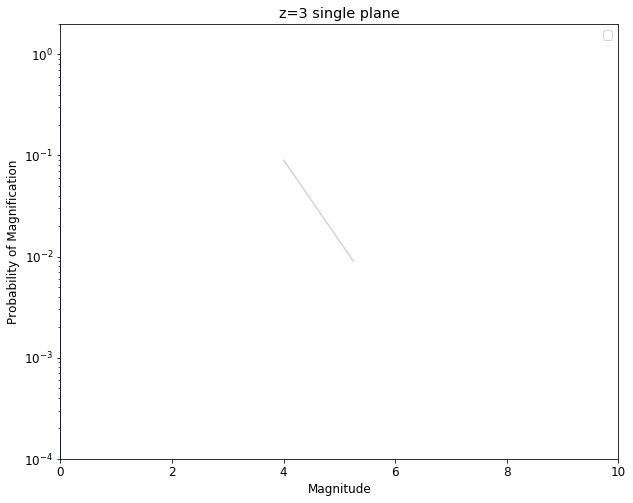

In [4]:
meancounthff=np.mean(counts,axis=0)
meansqcounthff=np.mean(counts**2,axis=0)
sdhff=np.sqrt(meansqcounthff-meancounthff**2)

horzhff=np.delete(bins[0],len(bins)-1)

fig, ax = plt.subplots(figsize=(10, 8))

ax.fill_between(horzhff, meancounthff+sdhff, meancounthff-sdhff,alpha=0.3)
ax.plot(horzhff,meancounthff)
ax.plot([4,5.25],[0.09,0.009],color="LightGray")

# plt.grid(True)
ax.axis([0, 10, 0.0001, 2])
plt.yscale('log')
plt.title('z=3 single plane')
ax.set_xlabel('Magnitude')
ax.set_ylabel('Probability of Magnification')
ax.legend(loc='upper right')
plt.show()

In [8]:
print(bins[1])

[0.         0.00800801 0.01601602 0.02402402 0.03203203 0.04004004
 0.04804805 0.05605606 0.06406406 0.07207207 0.08008008 0.08808809
 0.0960961  0.1041041  0.11211211 0.12012012 0.12812813 0.13613614
 0.14414414 0.15215215 0.16016016 0.16816817 0.17617618 0.18418418
 0.19219219 0.2002002  0.20820821 0.21621622 0.22422422 0.23223223
 0.24024024 0.24824825 0.25625626 0.26426426 0.27227227 0.28028028
 0.28828829 0.2962963  0.3043043  0.31231231 0.32032032 0.32832833
 0.33633634 0.34434434 0.35235235 0.36036036 0.36836837 0.37637638
 0.38438438 0.39239239 0.4004004  0.40840841 0.41641642 0.42442442
 0.43243243 0.44044044 0.44844845 0.45645646 0.46446446 0.47247247
 0.48048048 0.48848849 0.4964965  0.5045045  0.51251251 0.52052052
 0.52852853 0.53653654 0.54454454 0.55255255 0.56056056 0.56856857
 0.57657658 0.58458458 0.59259259 0.6006006  0.60860861 0.61661662
 0.62462462 0.63263263 0.64064064 0.64864865 0.65665666 0.66466466
 0.67267267 0.68068068 0.68868869 0.6966967  0.7047047  0.7127

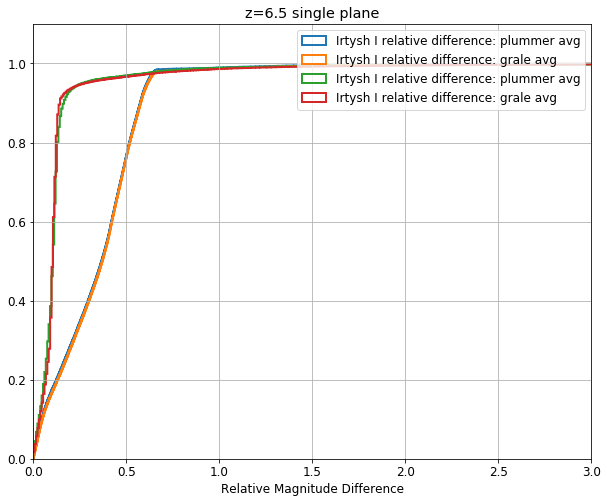

In [8]:
mag1= np.genfromtxt('../IrtyshI_longz/mag.dat', dtype=(
    {'names': ['iz','z','ix', 'iy','im' ,'xs','ys','mag','vol','magpervol'], 'formats': ['f8','f8','f8','f8','f8', 'f8', 'f8','f8', 'f8', 'f8']}))


b=np.split(mag1, 15)
mt=2.5*np.log10(b[7]['mag'])

fig, ax = plt.subplots(figsize=(10, 8))
n_bins = 10000
# ax.hist(b[7]['mag'], n_bins, density=True, histtype='step',cumulative=-1, label='Irtysh I true',linewidth=2) # Will multiplying help?
# ax.hist(mag['mag'], n_bins, density=True, histtype='step',cumulative=-1, label='Irtysh I true',linewidth=2) # Will multiplying help?

ax.hist(abs(mrp-mt)/mt, n_bins, density=True, histtype='step',cumulative=1, label='Irtysh I relative difference: plummer avg',linewidth=2) # Will multiplying help?
ax.hist(abs(muavg-mt)/mt, n_bins, density=True, histtype='step',cumulative=1, label='Irtysh I relative difference: grale avg',linewidth=2) # Will multiplying help?
ax.hist(abs(mag['mag']-b[7]['mag'])/b[7]['mag'], n_bins, density=True, histtype='step',cumulative=1, label='Irtysh I relative difference: plummer avg',linewidth=2) # Will multiplying help?
ax.hist(abs(mugrale-b[7]['mag'])/b[7]['mag'], n_bins, density=True, histtype='step',cumulative=1, label='Irtysh I relative difference: grale avg',linewidth=2) # Will multiplying help?

plt.grid(True)
plt.axis([0, 3, 0.001, 1.1])
# plt.yscale('log')
ax.set_title('z=6.5 single plane')
ax.set_xlabel('Relative Magnitude Difference')
# plt.xscale('log')
# ax2.set_title('IrtyshII')
# ax2.set_xlabel('Fractional Mass Dispersion')
ax.legend(loc='upper right')
plt.show()
fig.savefig('mag_rel_error_log.png', dpi=300)

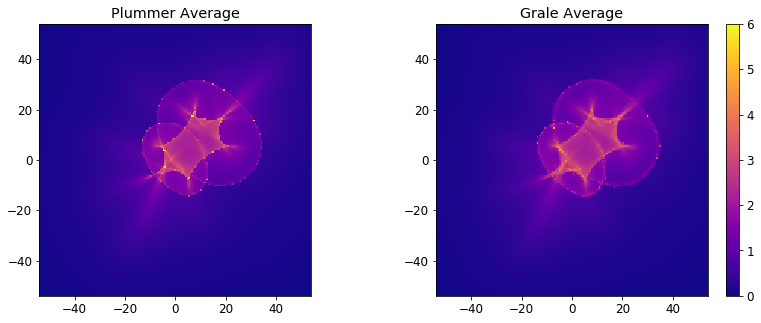

In [16]:
import matplotlib
import matplotlib.pyplot as plt
from matplotlib.colors import BoundaryNorm
from matplotlib.ticker import MaxNLocator
import numpy as np

x = np.linspace(-54, 54, 181)
y = np.linspace(-54, 54, 181)
X, Y = np.meshgrid(x, y)
Z1=(abs(muavg)).reshape(181,181)
Z2=(abs(mrp)).reshape(181,181)

fig, (ax0, ax1) = plt.subplots(ncols=2,figsize=(14, 5))

im1=ax1.pcolormesh(X,Y,Z1,vmax=6,cmap='plasma')
im2=ax0.pcolormesh(X,Y,Z2,vmax=6,cmap='plasma')
ax0.set_title('Plummer Average')
ax1.set_title('Grale Average')
ax0.set_aspect('equal')
ax1.set_aspect('equal')
# fig.colorbar(im1, ax=ax0)
fig.colorbar(im1, ax=ax1)
plt.show()
fig.savefig('SPmap_IrtyshIa_z6.5.png', dpi=300, transparent=True, bbox_inches='tight')

In [45]:
print(len(y))

181


In [46]:
print(X)

[[-9.  -8.9 -8.8 ...  8.8  8.9  9. ]
 [-9.  -8.9 -8.8 ...  8.8  8.9  9. ]
 [-9.  -8.9 -8.8 ...  8.8  8.9  9. ]
 ...
 [-9.  -8.9 -8.8 ...  8.8  8.9  9. ]
 [-9.  -8.9 -8.8 ...  8.8  8.9  9. ]
 [-9.  -8.9 -8.8 ...  8.8  8.9  9. ]]
